# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [14]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    # ... ENTER YOUR CODE HERE ...
    x=x0
    for i in range(maxiter):
        x1=x-f(x)/fder(x)
        if(abs(x-x1)<eps):
            print(i, x1)
            break
        else:
            print(i, x1)
            x=x1
    if i > maxiter:
        print("exceeding maxiter")
    






### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [15]:
# ... ENTER YOUR CODE HERE ...

def f(x):
    return x**2-1

def fder(x):
    return 2*x

newton_iteration(f,fder,2)


0 1.25
1 1.025
2 1.0003048780487804
3 1.0000000464611474
4 1.000000000000001


### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [16]:
# ... ENTER YOUR CODE HERE ...
def f(x):
    return (x**2-1)**2

def fder(x):
    return 4*(x**2-1)*x

def fder1(x):
    return fder(x)
def fder2(x):
    return fder(x)/2
def fder3(x):
    return fder(x)/3
def fder4(x):
    return fder(x)/4
def fder5(x):
    return fder(x)/5


newton_iteration(f,fder1,2)
newton_iteration(f,fder2,2)
newton_iteration(f,fder3,2)
newton_iteration(f,fder4,2)
newton_iteration(f,fder5,2)




0 1.625
1 1.3725961538461537
2 1.2115837178364541
3 1.115029286962704
4 1.0604813227008707
5 1.0311030033637607
6 1.0157860555564908
7 1.0079543594801006
8 1.0039928728699385
9 1.0020004063420738
10 1.0010012015801961
11 1.0005008511405977
12 1.000250488251871
13 1.0001252598080983
14 1.0000626338260628
15 1.000031317893719
16 1.0000156591920544
17 1.0000078296573287
0 1.25
1 1.025
2 1.0003048780487804
3 1.0000000464611474
4 1.000000000000001
0 0.875
1 1.0758928571428572
2 0.9660686499703616
3 1.0178595063032603
4 0.9913052709087296
5 1.0044045605851821
6 0.9978122060170418
7 1.0010974946943958
8 0.9994521550333973
9 1.0002741477072696
10 0.9998629824986405
11 1.000068522832956
12 0.9999657421048148
13 1.0000171298278253
14 0.9999914353061568
15 1.0000042824019375
16 0.9999978588127855
0 0.5
1 2.0
2 0.5
3 2.0
4 0.5
5 2.0
6 0.5
7 2.0
8 0.5
9 2.0
10 0.5
11 2.0
12 0.5
13 2.0
14 0.5
15 2.0
16 0.5
17 2.0
18 0.5
19 2.0
20 0.5
21 2.0
22 0.5
23 2.0
24 0.5
25 2.0
26 0.5
27 2.0
28 0.5
29 2.0
30 

# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

In [17]:
# ... ENTER YOUR CODE HERE ...
import matplotlib.pyplot as plt
import numpy as np
def f(x):
    return np.sqrt(x)-np.cos(x)
def fder(x):
    return 1/2*1/np.sqrt(x)+np.sin(x)
def fixpoint(f,x0,eps,a):
    x=x0
    i=0
    while True:
        i=i+1
        x1=x-a*f(x)
        if(abs(x1-x)<eps):
            print(i,x1)
            return
        else:
            x=x1
fixpoint(f,0.8,1e-5,1)
x = np.linspace(0.1, np.pi/2, 100)
plt.plot(x,np.sqrt(x), label='sqrt')
plt.plot(x,np.cos(x), label='cos')
plt.plot(x,f(x), label='f')
plt.plot(x,fder(x), label='fder')
m=fder(0.6)
M=fder(0.8)
fixpoint(f,0.8,1e-5,2/(m+M))

plt.legend()
plt.show()


8 0.6417154193768418
4 0.6417143674856997


<Figure size 640x480 with 1 Axes>

# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.

6 (1-1.0223137184661751e-17j)
4 (-0.4999999999999555+0.8660254037846933j)
4 (-0.4999999999999555-0.8660254037846933j)


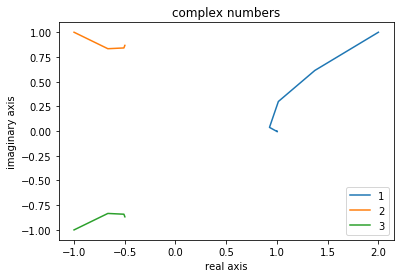

In [18]:
import cmath
def f(x):
    return x**3-1
def fder(x):
    return 3*x**2

def newton_iteration_complex(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    # ... ENTER YOUR CODE HERE ...
    rlst=[x0.real]
    ilst=[x0.imag]
    x=x0
    for i in range(maxiter):
        x1=x-f(x)/fder(x)
        rlst.append(x1.real)
        ilst.append(x1.imag)
        if(abs(x-x1)<eps):
            print(i,x1)
            return rlst,ilst
        else:
            x=x1
    print("exceeding maxiter")
    return rlst,ilst

rlst1,ilst1 = newton_iteration_complex(f,fder,2+1j)
rlst2,ilst2 = newton_iteration_complex(f,fder,-1+1j)
rlst3,ilst3 = newton_iteration_complex(f,fder,-1-1j)
plt.plot(rlst1,ilst1,label="1")
plt.plot(rlst2,ilst2,label="2")
plt.plot(rlst3,ilst3,label="3")
plt.xlabel('real axis')
plt.ylabel('imaginary axis')
plt.title('complex numbers')
plt.legend()
plt.show()
